In [181]:
import PIL.Image


In [19]:
import cv2
import numpy as np
from skimage import filters, morphology, measure

def detect_nk_cells(image):
    # If color, convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Enhance edges - NK cells should have stronger edge response
    edges = filters.sobel(gray)
    
    # You could also try Laplacian of Gaussian for ring-like structures
    log = cv2.GaussianBlur(gray, (5, 5), 0)
    log = cv2.Laplacian(log, cv2.CV_64F)
    
    # Threshold and find contours
    # The exact threshold will depend on your images
    _, binary = cv2.threshold(edges, np.percentile(edges, 85), 1, cv2.THRESH_BINARY)
    
    # Find circular/round objects
    labels = measure.label(binary > 0)
    props = measure.regionprops(labels, intensity_image=gray)
    
    nk_candidates = []
    for prop in props:
        # Filter by circularity and size
        circularity = 4 * np.pi * prop.area / (prop.perimeter ** 2) if prop.perimeter > 0 else 0
        if circularity > 0.7 and 100 < prop.area < 5000:  # adjust these thresholds
            nk_candidates.append(prop)
    
    return nk_candidates

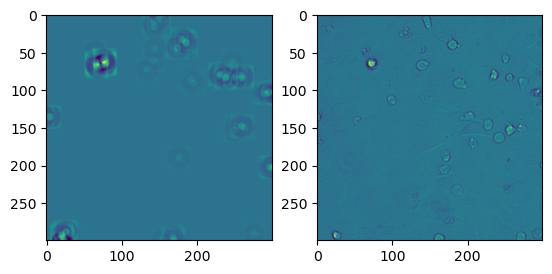

In [172]:
def create_ring_kernel(outer_radius, inner_radius):
    """Create a kernel that responds to ring structures"""
    size = 2 * outer_radius + 1
    y, x = np.ogrid[:size, :size]
    center = outer_radius
    r = np.sqrt((x - center)**2 + (y - center)**2)
    
    ring = np.zeros((size, size), dtype=np.float32)
    ring[(r >= inner_radius) & (r <= outer_radius)] = -1  # dark ring
    ring[r < inner_radius] = 1  # lighter center (optional)
    ring = ring - ring.mean()  # zero-mean
    return ring

def detect_rings(gray_image, outer_r=15, inner_r=5):
    kernel = create_ring_kernel(outer_r, inner_r)
    response = cv2.filter2D(gray_image.astype(np.float32), -1, kernel)
    # High response = likely NK cell
    return response
detections = detect_rings(img[:300, :300]<50)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(detections)
axs[1].imshow(img[:300, :300])

In [173]:
def detect_circles_hough(gray_image, min_radius=5, max_radius=15):

    
    blurred = cv2.GaussianBlur(gray_image, (9, 9), 2).astype(np.uint8)
    
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1.5,
        minDist=15,  # minimum distance between circle centers
        param1=15,   # edge detection threshold
        param2=32,   # accumulator threshold (lower = more circles)
        minRadius=min_radius,
        maxRadius=max_radius
    )
    return circles

In [11]:
path = '/mnt/data/2024-11-15-zkorwek--live/0204-ST/Img_t0000_ch4.png'

(<Figure size 1200x1000 with 1 Axes>,
 <Axes: title={'center': 'NK Cell Detections (n=1)'}>,
 array([[[257.25,  78.75,  14.15],
         [212.25, 156.75,  14.15],
         [ 33.75, 282.75,  14.15],
         [180.75, 276.75,  14.15],
         [135.75,  77.25,  12.5 ],
         [234.75,  89.25,  12.5 ],
         [ 65.25,  69.75,  12.5 ],
         [252.75, 225.75,  12.5 ],
         [117.75,  21.75,  14.15],
         [245.25,  54.75,  14.15],
         [279.75, 108.75,  14.15],
         [170.25, 182.25,  12.5 ],
         [224.25, 149.25,  12.5 ],
         [275.25, 284.25,  10.85],
         [272.25, 219.75,  14.15],
         [140.25,  50.25,  10.85],
         [104.25, 240.75,  14.15],
         [ 87.75,  74.25,  10.85],
         [ 99.75, 114.75,  10.85],
         [ 63.75, 120.75,  12.5 ],
         [ 81.75,  53.25,  10.85],
         [177.75,  92.25,  10.85],
         [201.75,  93.75,  10.85],
         [153.75,  62.25,  10.85],
         [234.75,  60.75,  12.5 ],
         [203.25, 134.25,   9.2 

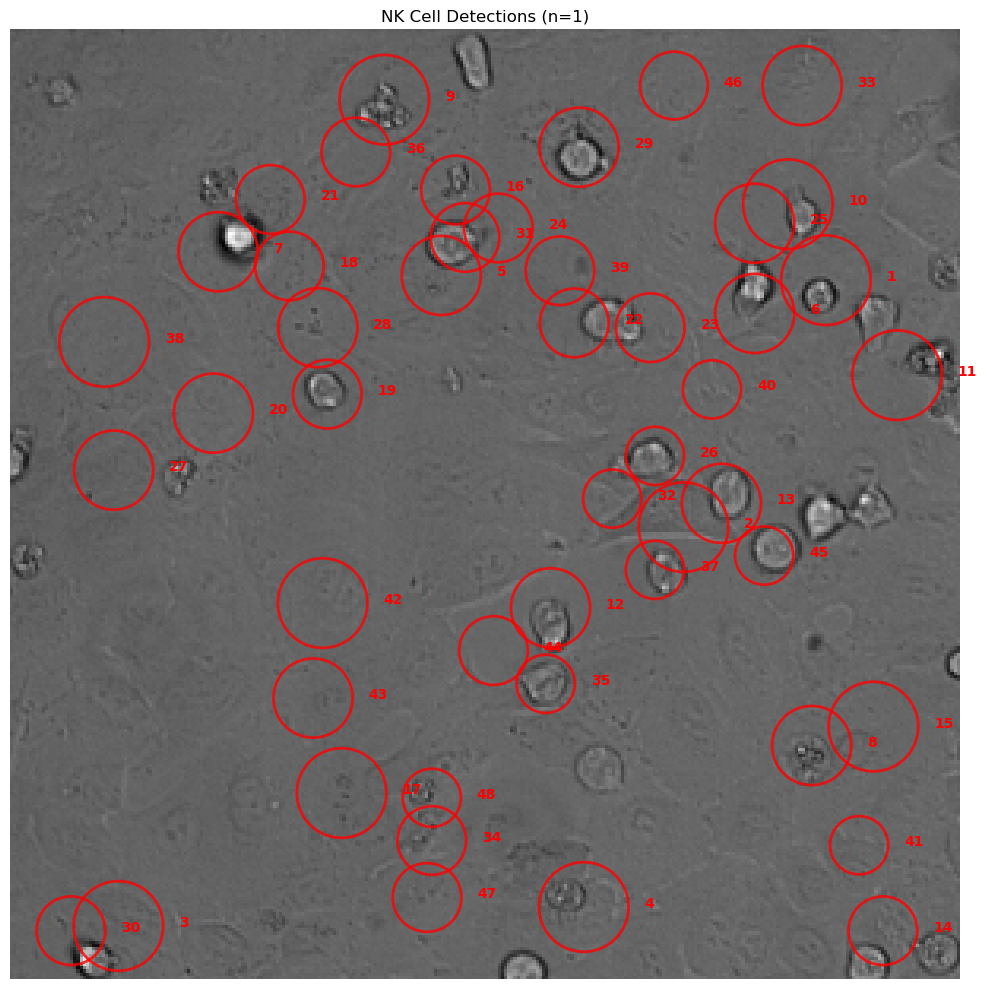

In [167]:
rings = detect_rings(img[:300, :300])
detections = detect_circles_hough(rings)
plot_nk_detections(img[:300, :300], detections)

(array([6.410000e+02, 2.890000e+03, 2.093700e+04, 1.496010e+05,
        4.018886e+06, 2.709162e+06, 7.030700e+04, 5.796000e+03,
        1.380000e+03, 5.640000e+02]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

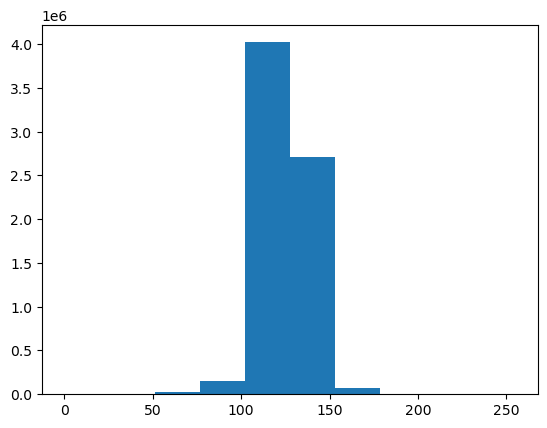

In [157]:
plt.hist(img.flatten())

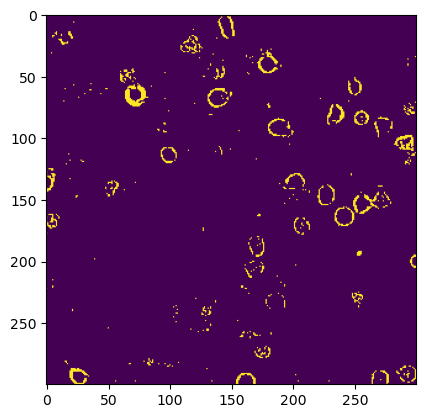

In [163]:
plt.imshow(img[:300, :300]<90)

In [ ]:
# tracking can be hard
# NK presence vs death - is there correlation?
# NK presence vs virus - is there correlation?

(<Figure size 1200x1000 with 1 Axes>,
 <Axes: title={'center': 'NK Cell Detections (n=1)'}>,
 array([[[188.25,  92.25,  10.4 ],
         [239.25, 158.25,  14.15],
         [138.75,  68.25,   9.95],
         [254.25,  83.25,   7.4 ],
         [231.75,  80.25,  10.7 ],
         [ 72.75,  65.25,   8.15],
         [227.25, 144.75,   8.75],
         [179.25,  41.25,   8.3 ],
         [174.75, 272.25,   7.4 ],
         [258.75, 153.75,   7.25],
         [249.75,  56.25,   6.8 ],
         [101.25, 113.25,   5.75],
         [164.25, 188.25,  14.15],
         [201.75, 135.75,   8.75],
         [138.75,  11.25,  10.4 ],
         [209.25, 168.75,   6.8 ],
         [269.25, 294.75,  10.1 ],
         [ 27.75, 293.25,   5.9 ],
         [117.75,  23.25,   6.35],
         [288.75, 102.75,   5.6 ],
         [120.75, 248.25,  14.15],
         [291.75, 290.25,   6.35],
         [273.75,  87.75,   9.05],
         [170.25, 209.25,   8.9 ],
         [210.75, 149.25,   7.55],
         [161.25, 299.25,   6.05

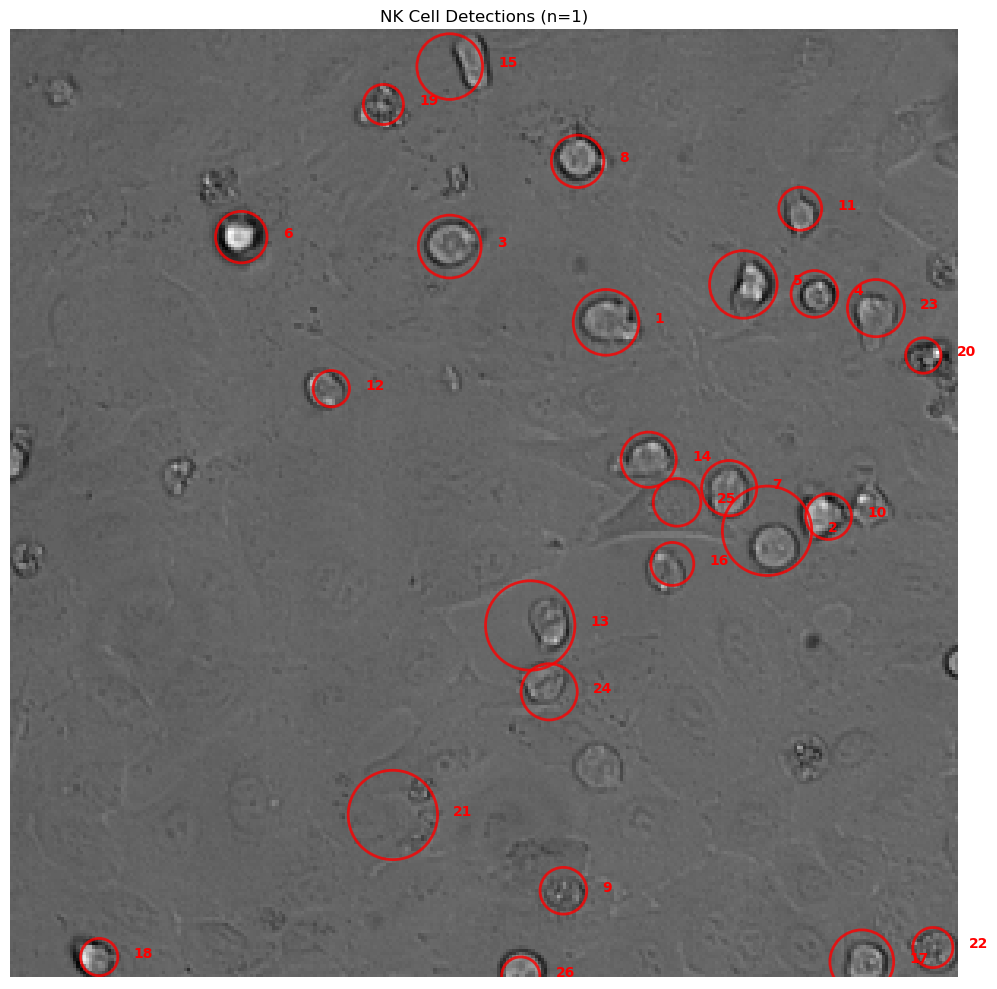

In [180]:
def detect_circles_hough(gray_image, min_radius=5, max_radius=15):
    
    
    blurred = cv2.GaussianBlur(gray_image, (9, 9), 2).astype(np.uint8)
    
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1.5,
        minDist=15,  # minimum distance between circle centers
        param1=20,   # edge detection threshold
        param2=15,   # accumulator threshold (lower = more circles)
        minRadius=min_radius,
        maxRadius=max_radius
    )
    return circles
detections = detect_circles_hough(img[:300, :300])
plot_nk_detections(img[:300, :300], detections)

TypeError: list indices must be integers or slices, not tuple

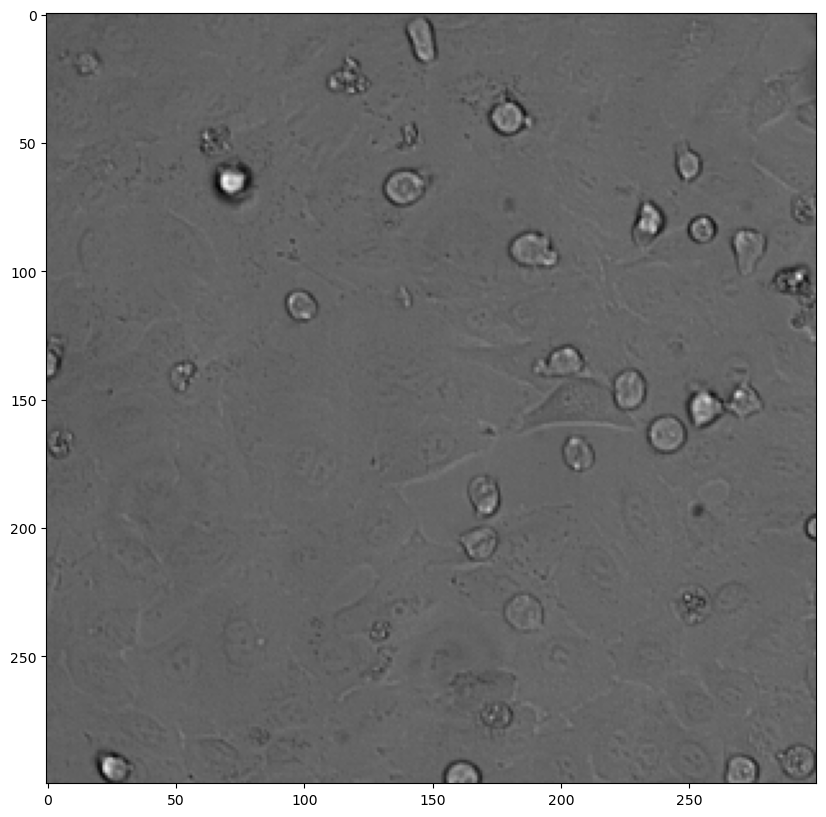

In [93]:
def plot_nk_detections(image, detections=None, figsize=(12, 10), 
                       circle_color='red', linewidth=2, alpha=0.8,
                       show_labels=True, title="NK Cell Detections", **detect_kwargs):
    """
    Plot brightfield image with overlayed NK cell detections.
    
    Parameters
    ----------
    image : np.ndarray
        Brightfield image
    detections : list, optional
        Pre-computed detections (regionprops). If None, will run detection.
    figsize : tuple
        Figure size
    circle_color : str
        Color for detection circles
    linewidth : float
        Width of detection circles
    alpha : float
        Transparency of circles
    show_labels : bool
        Whether to show detection numbers
    title : str
        Plot title
    **detect_kwargs
        Additional arguments passed to detect_nk_cells()
    
    Returns
    -------
    fig, ax : matplotlib figure and axis
    detections : list of detected regions
    """
    if detections is None:
        detections = detect_nk_cells(image, **detect_kwargs)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Display image
    if len(image.shape) == 3:
        ax.imshow(image)
    else:
        ax.imshow(image, cmap='gray')
    
    # Overlay detections
    for i, prop in enumerate(list(detections[0, ::])):

        # Draw circle around centroid with equivalent diameter
        x, y, radius = prop
        #y, x = prop.centroid
        #radius = prop.equivalent_diameter / 2
        
        circle = plt.Circle((x, y), radius, fill=False, 
                            color=circle_color, linewidth=linewidth, alpha=alpha)
        ax.add_patch(circle)
        
        if show_labels:
            ax.text(x + radius + 5, y, str(i + 1), color=circle_color, 
                   fontsize=10, fontweight='bold')
    
    ax.set_title(f"{title} (n={len(detections)})")
    ax.axis('off')
    plt.tight_layout()
    
    return fig, ax, detections
plot_nk_detections(img[:300, :300])

# Traccking with fixed image

In [215]:
fixed_path = '/mnt/data/2025-01-28-namirine-TBA/IF/0402-ST/Img_t0000_ch2.png'
live_path = '/mnt/data/2025-01-28-namirine-TBA/Live/0404-ST/Img_t0000_ch1.png'

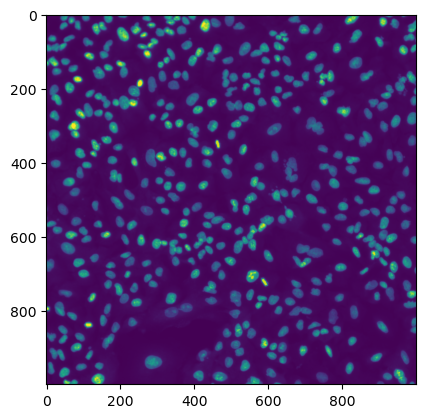

In [216]:
fixed_image = np.array(PIL.Image.open(fixed_path))
plt.imshow(fixed_image[:1000, :1000])

In [213]:
from skimage.registration import phase_cross_correlation
from scipy.optimize import linear_sum_assignment
from scipy.spatial import cKDTree

def track_frame_fast(prev, current, shift, max_distance=60):
    prev_centroids = prev[['x', 'y']].values
    centroids = current[['x', 'y']].values - np.array([shift[1], shift[0]])

    tree = cKDTree(prev_centroids)

    dists, indices = tree.query(centroids)#, distance_upper_bound=max_distance)
    print(dists.mean(), dists.std())
    tracks = prev[['track_id']].iloc[indices]

    return tracks, dists

def detect_shifts(img1, img2):
    
    shift_yx, error, _ = phase_cross_correlation(img1, img2, normalization=None)
    print(error)
    return shift_yx

In [207]:
detect_shifts(fixed_image, live_image)

array([-114.,  301.])

In [204]:
detect_shifts(live_image, fixed_image)

array([ 114., -301.])

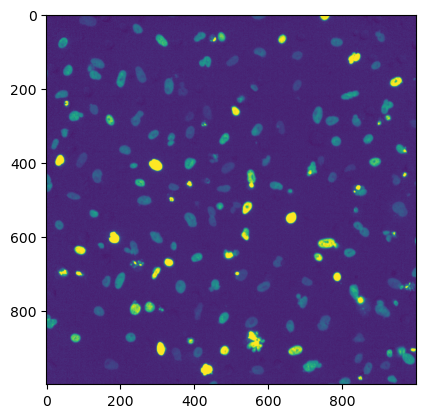

In [217]:
live_image = np.array(PIL.Image.open(live_path))
plt.imshow(live_image[:1000, :1000])

-114

0.9180175965517421


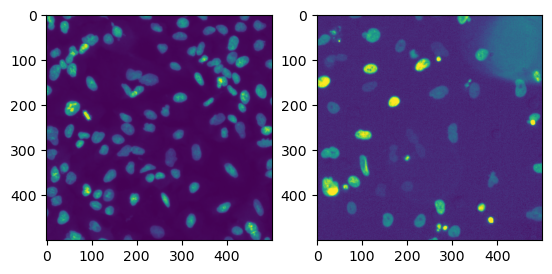

In [218]:
shift =detect_shifts(fixed_image, live_image)
x, y = int(shift[0]), int(shift[1])
fig, axs = plt.subplots(1,2)
axs[0].imshow(fixed_image[500:1000, 500:1000])
axs[1].imshow(live_image[500+x:x+1000, 500+y:y+1000])